# Available Motors :

In [69]:
from pynq import Overlay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from pynq import allocate
import ipywidgets as widgets
from IPython.display import display, clear_output
ol = Overlay("fft_8_test3.bit")
data_channel_1 = ol.fft_dma_0
Vib_acpe = np.array([0]*8, dtype = np.csingle)
Vib_axial = np.array([0]*8, dtype = np.csingle)
Vib_base = np.array([0]*8, dtype = np.csingle)


In [70]:
df_r0b = pd.read_excel('r0b_test_8pt.xlsx')
Vib_acpe_r0b = df_r0b.iloc[:, 0].to_numpy()
Vib_axial_r0b = df_r0b.iloc[:, 1].to_numpy()
Vib_base_r0b = df_r0b.iloc[:, 2].to_numpy()

df_r1b = pd.read_excel('r0b_test_8pt.xlsx')
Vib_acpe_r1b = df_r1b.iloc[:, 0].to_numpy()
Vib_axial_r1b = df_r1b.iloc[:, 1].to_numpy()
Vib_base_r1b = df_r1b.iloc[:, 2].to_numpy()

df_r2b = pd.read_excel('r2b_test_8pt.xlsx')
Vib_acpe_r2b = df_r2b.iloc[:, 0].to_numpy()
Vib_axial_r2b = df_r2b.iloc[:, 1].to_numpy()
Vib_base_r2b = df_r2b.iloc[:, 2].to_numpy()

df_r3b = pd.read_excel('r4b_test_8pt.xlsx')
Vib_acpe_r3b = df_r3b.iloc[:, 0].to_numpy()
Vib_axial_r3b = df_r3b.iloc[:, 1].to_numpy()
Vib_base_r3b = df_r3b.iloc[:, 2].to_numpy()

df_r4b = pd.read_excel('loose 25 test.xlsx')
Vib_acpe_r4b = df_r4b.iloc[:, 0].to_numpy()
Vib_axial_r4b = df_r4b.iloc[:, 1].to_numpy()
Vib_base_r4b = df_r4b.iloc[:, 2].to_numpy()

df_r5b = pd.read_excel('loose 50 test.xlsx')
Vib_acpe_r5b = df_r5b.iloc[:, 0].to_numpy()
Vib_axial_r5b = df_r5b.iloc[:, 1].to_numpy()
Vib_base_r5b = df_r5b.iloc[:, 2].to_numpy()

df_r6b = pd.read_excel('unbalanced motor test.xlsx')
Vib_acpe_r6b = df_r6b.iloc[:, 0].to_numpy()
Vib_axial_r6b = df_r6b.iloc[:, 1].to_numpy()
Vib_base_r6b = df_r6b.iloc[:, 2].to_numpy()

# df_r7b = pd.read_excel('r0b_test_8pt.xlsx')
# Vib_acpe_r7b = df_r7b.iloc[:, 0].to_numpy()
# Vib_axial_r7b = df_r7b.iloc[:, 1].to_numpy()
# Vib_base_r7b = df_r7b.iloc[:, 2].to_numpy()


data1_r0b = np.array(Vib_base_r0b, dtype=np.csingle)
data2_r0b = np.array(Vib_axial_r0b, dtype=np.csingle)
data3_r0b = np.array(Vib_acpe_r0b, dtype=np.csingle)

data1_r1b = np.array(Vib_base_r1b, dtype=np.csingle)
data2_r1b = np.array(Vib_axial_r1b, dtype=np.csingle)
data3_r1b = np.array(Vib_acpe_r1b, dtype=np.csingle)

data1_r2b = np.array(Vib_base_r2b, dtype=np.csingle)
data2_r2b = np.array(Vib_axial_r2b, dtype=np.csingle)
data3_r2b = np.array(Vib_acpe_r2b, dtype=np.csingle)

data1_r3b = np.array(Vib_base_r3b, dtype=np.csingle)
data2_r3b = np.array(Vib_axial_r3b, dtype=np.csingle)
data3_r3b = np.array(Vib_acpe_r3b, dtype=np.csingle)

data1_r4b = np.array(Vib_base_r4b, dtype=np.csingle)
data2_r4b = np.array(Vib_axial_r4b, dtype=np.csingle)
data3_r4b = np.array(Vib_acpe_r4b, dtype=np.csingle)

data1_r5b = np.array(Vib_base_r5b, dtype=np.csingle)
data2_r5b = np.array(Vib_axial_r5b, dtype=np.csingle)
data3_r5b = np.array(Vib_acpe_r5b, dtype=np.csingle)

data1_r6b = np.array(Vib_base_r6b, dtype=np.csingle)
data2_r6b = np.array(Vib_axial_r6b, dtype=np.csingle)
data3_r6b = np.array(Vib_acpe_r6b, dtype=np.csingle)

# data1_r7b = np.array(Vib_base_r7b, dtype=np.csingle)
# data2_r7b = np.array(Vib_axial_r7b, dtype=np.csingle)
# data3_r7b = np.array(Vib_acpe_r7b, dtype=np.csingle)


In [98]:

choose_motor = widgets.ToggleButtons(
    options=['Motor 1', 'Motor 2', 'Motor 3', 'Motor 4', 'Motor 5', 'Motor 6'],
    description='Select Motor:'
)

output = widgets.Output()

chosen_motor_widget = widgets.IntText(value=None, description='Chosen Motor:', disabled=True)

# Function to capture the change and display the selected motor
def on_motor_change(change):
    global chosen_motor_value
    with output:
        clear_output(wait=True)  # Clears previous output
        # Set the chosen motor value based on the selected option
        if change.new == 'Motor 1':
            chosen_motor_widget.value = 1
            chosen_motor_value = 1  # Update the global variable
        elif change.new == 'Motor 2':
            chosen_motor_widget.value = 2
            chosen_motor_value = 2
        elif change.new == 'Motor 3':
            chosen_motor_widget.value = 3
            chosen_motor_value = 3
        elif change.new == 'Motor 4':
            chosen_motor_widget.value = 4
            chosen_motor_value = 4
        elif change.new == 'Motor 5':
            chosen_motor_widget.value = 5
            chosen_motor_value = 5
        elif change.new == 'Motor 6':
            chosen_motor_widget.value = 6
            chosen_motor_value = 6
#         elif change.new == 'Motor 7':
#             chosen_motor_widget.value = 7
#             chosen_motor_value = 7
        else:
            chosen_motor_widget.value = 1  # Default to Motor 1 if unrecognized
            chosen_motor_value = 1  # Default value

        # Call another function with the selected motor value
        update_motor_status(chosen_motor_widget.value)

# Function that reacts to motor value change
def update_motor_status(motor_value):
    print('')

# Observe the change in the toggle buttons
choose_motor.observe(on_motor_change, names='value')

display(choose_motor, output, chosen_motor_widget)

ToggleButtons(description='Select Motor:', options=('Motor 1', 'Motor 2', 'Motor 3', 'Motor 4', 'Motor 5', 'Mo…

Output()

IntText(value=0, description='Chosen Motor:', disabled=True)

In [99]:
chosen_motor=chosen_motor_value
if chosen_motor == 1:
    Vib_acpe = data1_r1b
    Vib_axial = data2_r1b
    Vib_base = data3_r1b
elif chosen_motor == 2:
    Vib_acpe = Vib_acpe_r2b
    Vib_axial = Vib_axial_r2b
    Vib_base = Vib_base_r2b
elif chosen_motor == 3:
    Vib_acpe = Vib_acpe_r3b
    Vib_axial = Vib_axial_r3b
    Vib_base = Vib_base_r3b
elif chosen_motor == 4:
    Vib_acpe = Vib_acpe_r4b
    Vib_axial = Vib_axial_r4b
    Vib_base = Vib_base_r4b
elif chosen_motor == 5:
    Vib_acpe = Vib_acpe_r5b
    Vib_axial = Vib_axial_r5b
    Vib_base = Vib_base_r5b
elif chosen_motor == 6:
    Vib_acpe = Vib_acpe_r6b
    Vib_axial = Vib_axial_r6b
    Vib_base = Vib_base_r6b
elif chosen_motor == 7:
    Vib_acpe = Vib_acpe_r7b
    Vib_axial = Vib_axial_r7b
    Vib_base = Vib_base_r7b
else:  # Default case (r0b)
    Vib_acpe = Vib_acpe_r0b
    Vib_axial = Vib_axial_r0b
    Vib_base = Vib_base_r0b


# Amplitude Spectrum :

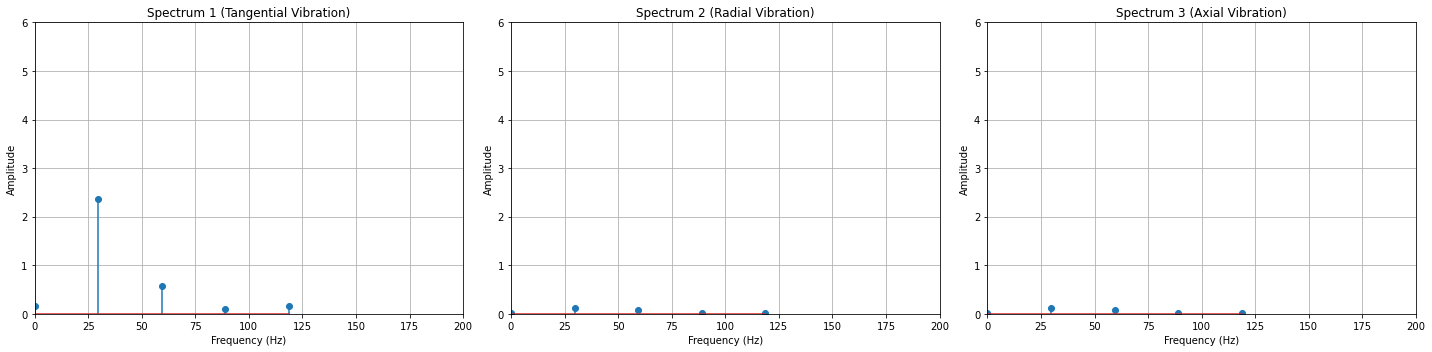

Motor Health : Good    Damage Level : 0 % 


In [100]:
#input and output buffers
input_buffer = allocate(8, np.csingle)
output_buffer = allocate(8, np.csingle)

# Send and receive channels
send_channel = data_channel_1.sendchannel
recv_channel = data_channel_1.recvchannel

# Transfer data for Vib_base
np.copyto(input_buffer, Vib_base)
send_channel.transfer(input_buffer)
recv_channel.transfer(output_buffer)
send_channel.wait()
recv_channel.wait()

# Prepare output1
output1 = np.array([0] * 8, dtype=np.cdouble)
np.copyto(output1, output_buffer)

# Transfer data for Vib_axial
input_buffer = allocate(8, np.csingle)
output_buffer = allocate(8, np.csingle)

np.copyto(input_buffer, Vib_axial)
send_channel.transfer(input_buffer)
recv_channel.transfer(output_buffer)
send_channel.wait()
recv_channel.wait()

# Prepare output2
output2 = np.array([0] * 8, dtype=np.cdouble)
np.copyto(output2, output_buffer)

# Transfer data for Vib_acpe
input_buffer = allocate(8, np.csingle)
output_buffer = allocate(8, np.csingle)

np.copyto(input_buffer, Vib_acpe)
send_channel.transfer(input_buffer)
recv_channel.transfer(output_buffer)
send_channel.wait()
recv_channel.wait()

# Prepare output3
output3 = np.array([0] * 8, dtype=np.cdouble)
np.copyto(output3, output_buffer)

# Sampling frequency and DFT parameters
Fs = 7600 / 32  # Sampling frequency
N = 8           # N-point DFT

if chosen_motor == 1 or chosen_motor == 2 or chosen_motor == 3:
    f = np.arange(0, N) * (Fs / N)
    # Calculate the magnitude of the spectra
    P_1 = np.abs(output1[:N // 2 + 1]) / (N + 4)
    P_2 = np.abs(output2[:N // 2 + 1]) / (N + 4)
    P_3 = P_2
else: 
    f = (np.arange(0, N) * (Fs / N)) - 20
    # Calculate the magnitude of the spectra
    P_1 = np.abs(output1[:N // 2 + 1]) / (N + 4)
    P_3 = np.abs(output2[:N // 2 + 1]) / (N + 4)
    P_2 = np.abs(output3[:N // 2 + 1]) / (N + 4)

# # Calculate the magnitude of the spectra
# P_1 = np.abs(output1[:N // 2 + 1]) / (N + 4)
# P_2 = np.abs(output2[:N // 2 + 1]) / (N + 4)
# P_3 = np.abs(output3[:N // 2 + 1]) / (N + 4)

# Frequency values for the plots
f_1 = f[:N // 2 + 1]
f1 = f_1
f2 = f_1
f3 = f_1

# Spectrum values
P1 = P_1
P2 = P_2
P3 = P_3

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Data for plotting
data = [(f1, P1), (f2, P2), (f3, P3)]
titles = ['Spectrum 1 (Tangential Vibration)', 'Spectrum 2 (Radial Vibration)', 'Spectrum 3 (Axial Vibration)']


for i, ax in enumerate(axes):
    f, P = data[i]
    ax.stem(f, P, use_line_collection=True)
    ax.set_xlim(0, 200)
    ax.set_ylim(0, 6)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_title(titles[i])
    ax.grid(True)

plt.tight_layout()
plt.show()

# print('Motor Health : Good    Damage Level : 0 % ')
if chosen_motor == 1 or chosen_motor == 2 or chosen_motor == 3:
    if P1[1] < 2.5:
        print('Motor Health : Good    Damage Level : 0 % ')
    elif P1[1] < 3:
        print('Motor Health : Slightly damaged    Damage Level : 6 % ')
    elif P1[1] < 4:
        print('Motor Health : Damaged    Damage Level : 12 % ')

elif chosen_motor == 4 or chosen_motor == 5:
    if P2[1] < 1:
        print('Motor Health : Frame Loose    Looseness Level : 25 % ')
    elif P2[1] < 2:
        print('Motor Health : Frame Loose High   Looseness Level : 50 % ')

elif chosen_motor == 6: 
        print('Motor Health : Unbalanced')
else: 
    print ('Motor data unavailable')